# Regression basics

Taken from http://alexanderdemos.org/Mixed1.html

Warning message in plot.window(...):
“"smoother" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"smoother" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"smoother" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"smoother" is not a graphical parameter”Warning message in box(...):
“"smoother" is not a graphical parameter”Warning message in title(...):
“"smoother" is not a graphical parameter”

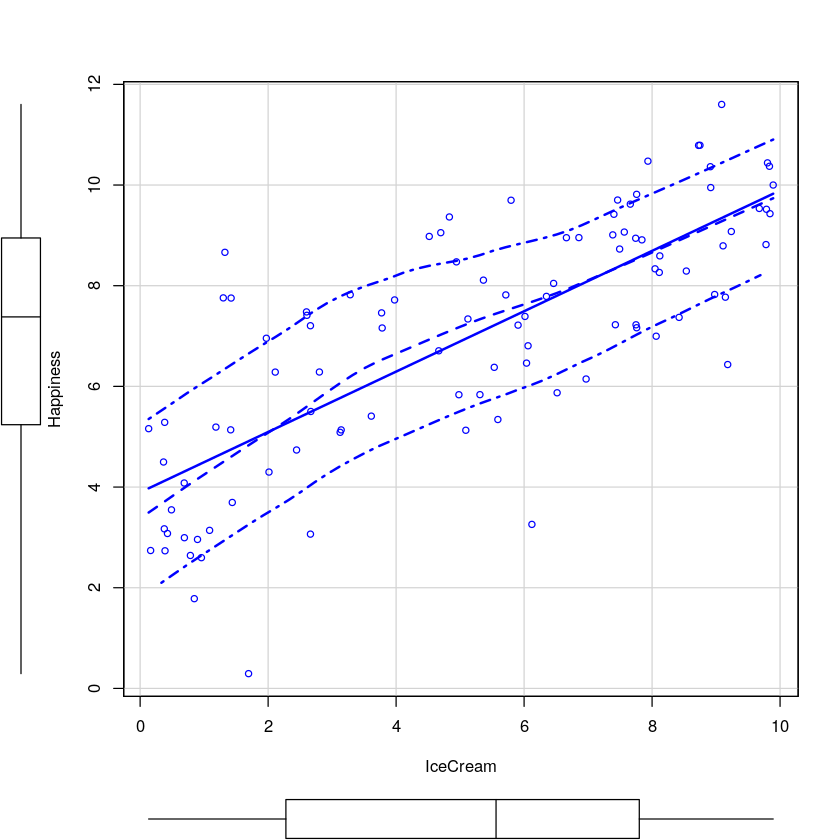

In [22]:
set.seed(666)
library(car) #graph data
# 100 people
n <- 100
# Uniform distrobution of Ice Cream scoops
X <- runif(n, 0, 10)
# Slope
Byx<-.6
#intercept
B0 <- 4
# noise 
e <- rnorm(n, sd=1.5)
# Our equation to  create Y
Y = Byx*X + B0 + e
#Convert them to a "Data.Frame", which is like SPSS data window
#Built our data frame
IceCreamStudy<-data.frame(Happiness=Y,IceCream=X)
#Extract vectors
IceCream<-IceCreamStudy$IceCream
Happiness<-IceCreamStudy$Happiness 
scatterplot(Happiness~IceCream, smoother=FALSE)

In [18]:
Happy.Model.1<-lm(Happiness~IceCream,data = IceCreamStudy)


In [19]:
library(stargazer) # Make APA like tables
stargazer(Happy.Model.1,type="text",
          intercept.bottom = FALSE,
          single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001),
          notes.append = FALSE,
          header=FALSE)


                         Dependent variable:     
                    -----------------------------
                              Happiness          
-------------------------------------------------
Constant                  3.895*** (0.301)       
IceCream                  0.600*** (0.050)       
-------------------------------------------------
Observations                     100             
R2                              0.595            
Adjusted R2                     0.591            
Residual Std. Error        1.551 (df = 98)       
F Statistic            144.046*** (df = 1; 98)   
Note:               *p<0.05; **p<0.01; ***p<0.001


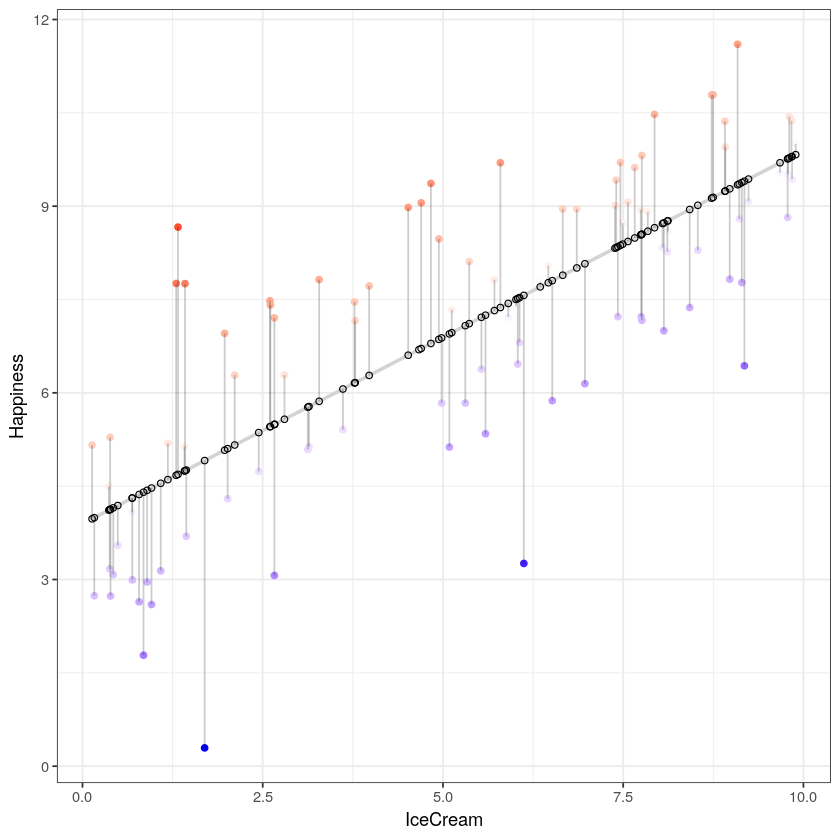

In [20]:
#  Save the predicted values with our real data
IceCreamStudy$predicted <- predict(Happy.Model.1)  
# Save the residual values
IceCreamStudy$residuals <- residuals(Happy.Model.1) 

library(ggplot2)  #Fancy pants plotting system
ggplot(data = IceCreamStudy, aes(x = IceCream, y = Happiness)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # Plot regression slope
  geom_point(aes(color = residuals)) +  # Color mapped here
  scale_color_gradient2(low = "blue", mid = "white", high = "red") +  # Colors to use here
  guides(color = FALSE) +
  geom_segment(aes(xend = IceCream, yend = predicted), alpha = .2) +  # alpha to fade lines
  geom_point(aes(y = predicted), shape = 1) +
  theme_bw()  # Add theme for cleaner look

In [21]:
n=length(IceCreamStudy$residuals)
RSE = sqrt(sum(IceCreamStudy$residuals^2) / (n-2))

ISE = RSE*(sqrt( (1 / n) + (mean(IceCreamStudy$IceCream))^2 
                  / ((n - 1)*var(IceCreamStudy$IceCream))))

#lets extract the r2 from the model
r2.model<-summary(Happy.Model.1)$r.squared
SSE = sd(IceCreamStudy$Happiness)/sd(IceCreamStudy$IceCream) * 
          sqrt((1- r2.model)/ (n - 2))

anova(Happy.Model.1)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
IceCream,1,346.2935,346.293474,144.0455,5.94473e-21
Residuals,98,235.5975,2.404056,NA,NA


In [23]:
#intercept
t.I= Happy.Model.1$coefficients[1]/ISE
#Slope
t.S= Happy.Model.1$coefficients[2]/SSE
# For r-squared
t.r2xy = r2.model^.5*sqrt(n-2)/sqrt(1-r2.model)
F.r2xy = t.r2xy^2

In [29]:
anova(Happy.Model.1)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
IceCream,1,346.2935,346.293474,144.0455,5.94473e-21
Residuals,98,235.5975,2.404056,NA,NA


In [30]:
library(MASS) # use multivariate norm function to better control relationships
py1 =.6 #Cor between X1 (ice cream) and happiness
py2 =.4 #Cor between X2 (Brownies) and happiness
p12 = 0 #Cor between X1 (ice cream) and X2 (Brownies)
Means.X1X2Y<- c(5,5,5) #set the means of X and Y variables
CovMatrix.X1X2Y <- matrix(c(1,p12,py1,
                            p12,1,py2,
                            py1,py2,1),3,3)*4 # creates the covariate matrix 
#build the correlated variables. Note: empirical=TRUE means make the correlation EXACTLY r. 
# if we say empirical=FALSE, the correlation would be normally distributed around r
set.seed(666)
CorrDataT<-mvrnorm(n=100, mu=Means.X1X2Y,Sigma=CovMatrix.X1X2Y, empirical=TRUE)
#Covert them to a "Data.Frame", which is like SPSS data window
CorrDataT<-as.data.frame(CorrDataT)
#lets add our labels to the vectors we created
colnames(CorrDataT) <- c("IceCream","Brownies","Happiness")
CorrDataT$Happiness<-CorrDataT$Happiness
# Correlations
ry1<-cor(CorrDataT$Happiness,CorrDataT$IceCream)
ry2<-cor(CorrDataT$Happiness,CorrDataT$Brownies)
r12<-cor(CorrDataT$Brownies,CorrDataT$IceCream)

In [33]:
###############Model 1 
Ice.Model<-lm(Happiness~ IceCream, data = CorrDataT)
###############Model 2
Ice.Brown.Model<-lm(Happiness~ IceCream+Brownies, data = CorrDataT)
stargazer(Ice.Model,Ice.Brown.Model,type="text",
         column.labels = c("Model 1", "Model 2"),
          intercept.bottom = FALSE,
          single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001),
          notes.append = FALSE,
          header=FALSE)


                                 Dependent variable:             
                    ---------------------------------------------
                                      Happiness                  
                           Model 1                Model 2        
                             (1)                    (2)          
-----------------------------------------------------------------
Constant               2.000*** (0.435)        0.000 (0.517)     
IceCream               0.600*** (0.081)       0.600*** (0.070)   
Brownies                                      0.400*** (0.070)   
-----------------------------------------------------------------
Observations                 100                    100          
R2                          0.360                  0.520         
Adjusted R2                 0.353                  0.510         
Residual Std. Error    1.608 (df = 98)        1.400 (df = 97)    
F Statistic         55.125*** (df = 1; 98) 52.542*** (df = 2; 97)
Note:    

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
lattice theme set by effectsTheme()
See ?effectsTheme for details.


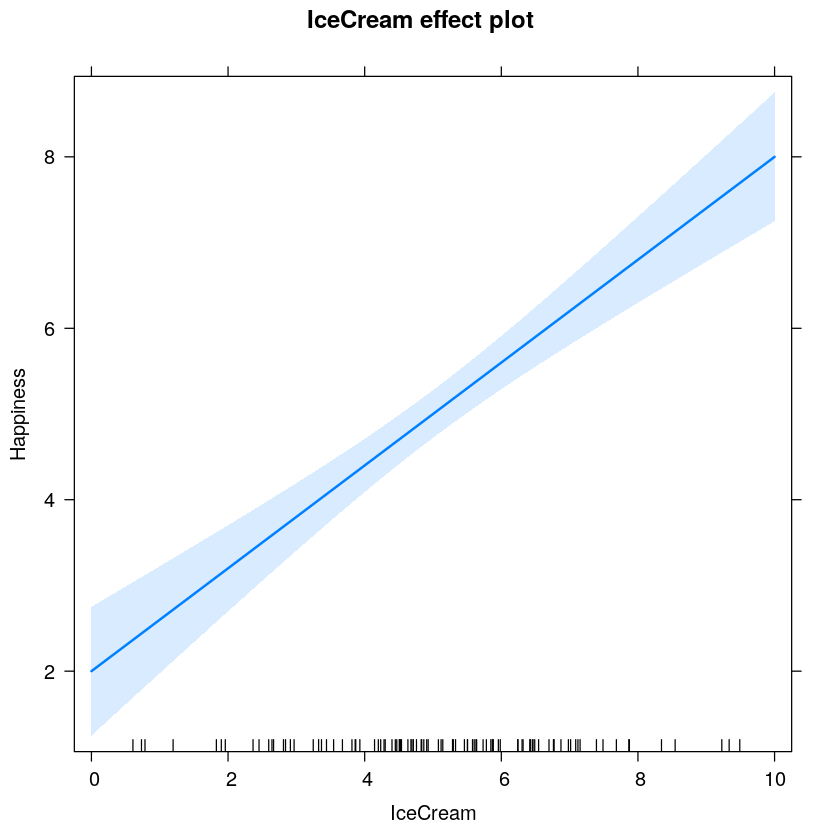

In [36]:
#packages we will need to plot our results
library(effects)
#plot individual effects
Ice.Brown.Model.Plot <- allEffects(Ice.Brown.Model, 
                                   xlevels=list(IceCream=seq(0, 10, 1),
                                                Brownies=seq(0, 10, 1)))
plot(Ice.Brown.Model.Plot, 
     'IceCream', ylab="Happiness")

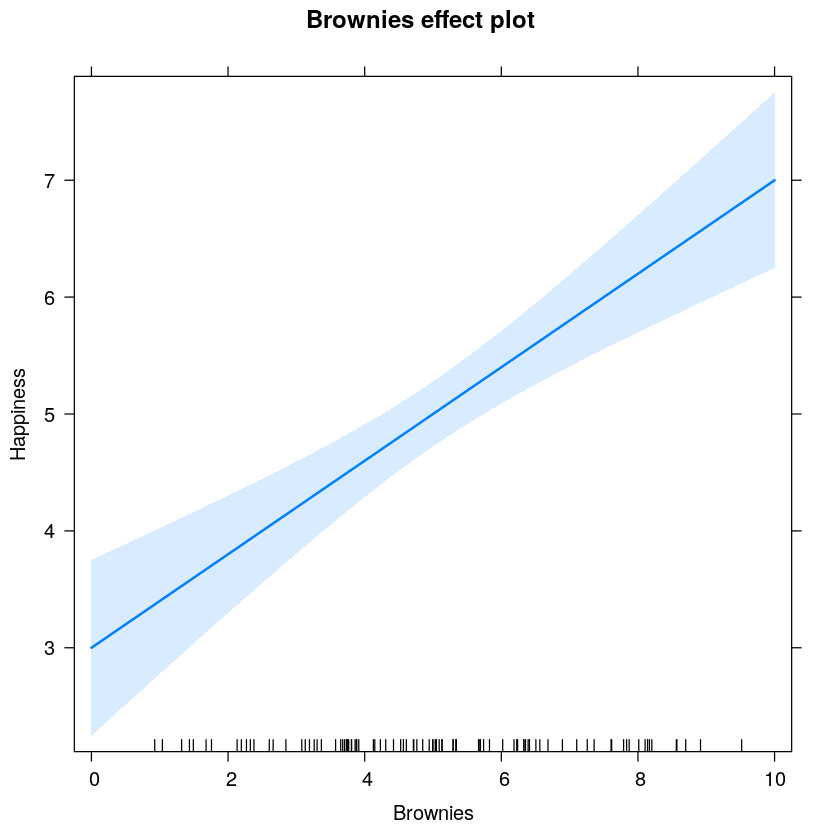

In [37]:
plot(Ice.Brown.Model.Plot, 
     'Brownies', ylab="Happiness")

Warning message in effect.llines(x[good], y[good], lwd = lwd, col = colors[1], lty = lines, :
“spline interpolation may be unstable with only 2 points”Warning message in panel.bands(x[good], y[good], upper[subscripts][good], lower[subscripts][good], :
“spline interpolation may be unstable with only 2 points”Warning message in effect.llines(x[good], y[good], lwd = lwd, col = colors[1], lty = lines, :
“spline interpolation may be unstable with only 2 points”Warning message in panel.bands(x[good], y[good], upper[subscripts][good], lower[subscripts][good], :
“spline interpolation may be unstable with only 2 points”

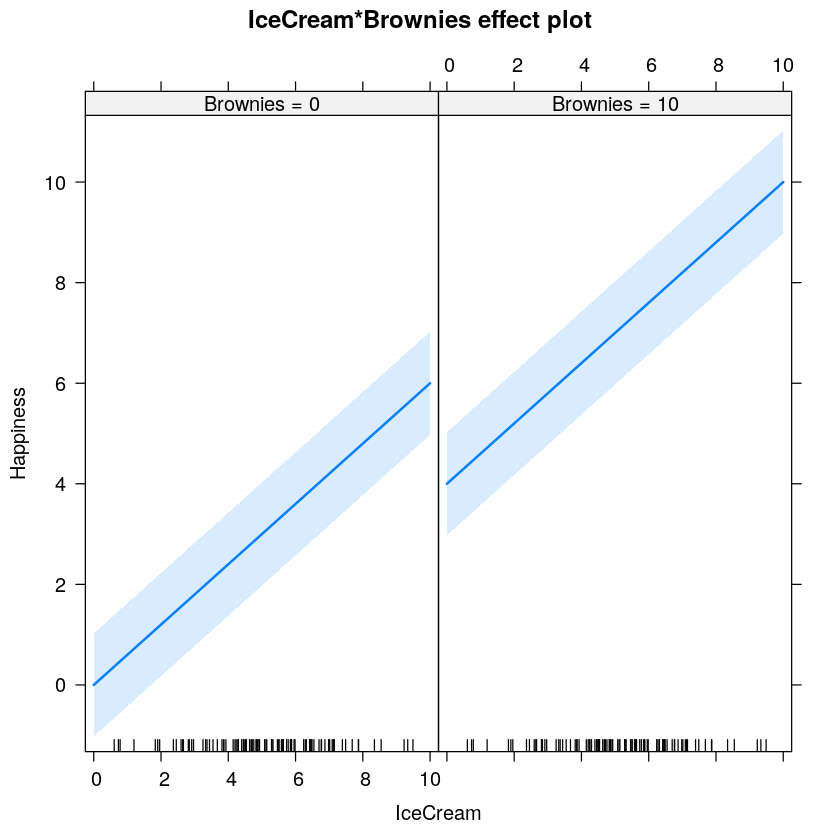

In [38]:
#plot both effects
Ice.Brown.Model.Plot2<-Effect(c("IceCream", "Brownies"), 
                              Ice.Brown.Model,
                              xlevels=list(IceCream=c(0, 10), 
                                           Brownies=c(0,10)))
plot(Ice.Brown.Model.Plot2)

In [39]:
# Center variables (if you said scale = TRUE it would zscore the predictors)
CorrDataT$IceCream.C<-scale(CorrDataT$IceCream, scale=FALSE, center=TRUE)[,]
CorrDataT$Brownies.C<-scale(CorrDataT$Brownies, scale=FALSE, center=TRUE)[,]
###############Model 1 Centered
Ice.Model.C<-lm(Happiness~ IceCream.C, data = CorrDataT)
###############Model C Centered
Ice.Brown.Model.C<-lm(Happiness~ IceCream.C+Brownies.C, data = CorrDataT)

In [41]:
stargazer(Ice.Model.C,Ice.Brown.Model.C,type="text",
         column.labels = c("Model 1", "Model 2"),
          intercept.bottom = FALSE,
          single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001),
          notes.append = FALSE,
          header=FALSE)


                                 Dependent variable:             
                    ---------------------------------------------
                                      Happiness                  
                           Model 1                Model 2        
                             (1)                    (2)          
-----------------------------------------------------------------
Constant               5.000*** (0.161)       5.000*** (0.140)   
IceCream.C             0.600*** (0.081)       0.600*** (0.070)   
Brownies.C                                    0.400*** (0.070)   
-----------------------------------------------------------------
Observations                 100                    100          
R2                          0.360                  0.520         
Adjusted R2                 0.353                  0.510         
Residual Std. Error    1.608 (df = 98)        1.400 (df = 97)    
F Statistic         55.125*** (df = 1; 98) 52.542*** (df = 2; 97)
Note:    

In [43]:
library(MASS) #create data
py1 =.6 #Cor between X1 (ice cream) and happiness
py2 =.4 #Cor between X2 (Brownies) and happiness
p12= .3 #Cor between X1 (ice cream) and X2 (Brownies)
Means.X1X2Y<- c(5,5,5) #set the means of X and Y variables
CovMatrix.X1X2Y <- matrix(c(1,p12,py1,
                            p12,1,py2,
                            py1,py2,1),3,3)*4 # creates the covariate matrix 
set.seed(42)
CorrDataT2<-mvrnorm(n=100, mu=Means.X1X2Y,Sigma=CovMatrix.X1X2Y, empirical=TRUE)
#Convert them to a "Data.Frame", which is like SPSS data window
CorrDataT2<-as.data.frame(CorrDataT2)
#lets add our labels to the vectors we created
colnames(CorrDataT2) <- c("IceCream","Brownies","Happiness")
# Pearson Correlations
ry1<-cor(CorrDataT2$Happiness,CorrDataT2$IceCream)
ry2<-cor(CorrDataT2$Happiness,CorrDataT2$Brownies)
r12<-cor(CorrDataT2$Brownies,CorrDataT2$IceCream)
# What the problem?

In [44]:
# Center variables (if you said scale = TRUE it would zscore the predictors)
CorrDataT2$IceCream.C<-scale(CorrDataT2$IceCream, scale=FALSE, center=TRUE)[,]
CorrDataT2$Brownies.C<-scale(CorrDataT2$Brownies, scale=FALSE, center=TRUE)[,]
###############Model 1 Centered
Ice.Model.C2<-lm(Happiness~ IceCream.C, data = CorrDataT2)
###############Model C Centered
Ice.Brown.Model.C2<-lm(Happiness~ IceCream.C+Brownies.C, data = CorrDataT2)

In [46]:
stargazer(Ice.Model.C2,Ice.Brown.Model.C2,type="text",
         column.labels = c("Model 1", "Model 2"),
          intercept.bottom = FALSE, single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001), notes.append = FALSE,
          header=FALSE)


                                 Dependent variable:             
                    ---------------------------------------------
                                      Happiness                  
                           Model 1                Model 2        
                             (1)                    (2)          
-----------------------------------------------------------------
Constant               5.000*** (0.161)       5.000*** (0.155)   
IceCream.C             0.600*** (0.081)       0.527*** (0.082)   
Brownies.C                                    0.242** (0.082)    
-----------------------------------------------------------------
Observations                 100                    100          
R2                          0.360                  0.413         
Adjusted R2                 0.353                  0.401         
Residual Std. Error    1.608 (df = 98)        1.548 (df = 97)    
F Statistic         55.125*** (df = 1; 98) 34.150*** (df = 2; 97)
Note:    

In [47]:
R2y.12<-sqrt((ry1^2+ry2^2 - (2*ry1*ry2*r12))/(1-r12^2))^2
  a = R2y.12 -ry2^2 
  b = R2y.12 -ry1^2 

In [50]:
# control for brownies
CorrDataT2$Ice.control.Brownies<-residuals(lm(IceCream~Brownies, CorrDataT2))
Sr1.alt<-cor(CorrDataT2$Ice.control.Brownies,CorrDataT2$Happiness)

In [51]:
#control for ice cream
CorrDataT2$Brownies.control.Ice<-residuals(lm(Brownies~IceCream, CorrDataT2))
Sr2.alt<-cor(CorrDataT2$Happiness,CorrDataT2$Brownies.control.Ice)

In [54]:
library(relaimpo)
 crlm <- calc.relimp(Ice.Brown.Model.C2,
                     type = c("first","last"), rela = FALSE )
 crlm

Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:car’:

    logit

Loading required package: survey
Loading required package: grid
Loading required package: Matrix
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:boot’:

    aml


Attaching package: ‘survey’

The following object is masked from ‘package:graphics’:

    dotchart

Loading required package: mitools
This is the global version of package relaimpo.

If you are a non-US user, a version with the interesting additional metric pmvd is available

from Ulrike Groempings web site at prof.beuth-hochschule.de/groemping.

Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

Response variable: Happiness 
Total response variance: 4 
Analysis based on 100 observations 

2 Regressors: 
IceCream.C Brownies.C 
Proportion of variance explained by model: 41.32%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                 last first
IceCream.C 0.25318681  0.36
Brownies.C 0.05318681  0.16

In [55]:
library(MASS) # use multivariate norm function to better control relationships
I.py1 =.6 #Cor between X1 Oreos and happiness
I.py2 =.6 #Cor between X2 Cookies and happiness
I.p12 = .99 #Cor between X1 Oreos and X2 Cookies
I.Means.X1X2Y<- c(0,0,0) #set the means of X and Y variables
I.CovMatrix.X1X2Y <- matrix(c(1,I.p12,I.py1,
                            I.p12,1,I.py2,
                            I.py1,I.py2,1),3,3)*4 # creates the covariate matrix 
set.seed(42)
IData<-mvrnorm(n=100, mu=I.Means.X1X2Y,Sigma=I.CovMatrix.X1X2Y, empirical=TRUE)
#Covert them to a "Data.Frame", which is like SPSS data window
IData<-as.data.frame(IData)
#lets add our labels to the vectors we created
colnames(IData) <- c("Oreos","Cookies","Happiness")
###############Model 1 
Oreos.model<-lm(Happiness~ Oreos, data = IData)
###############Model 2 
Cookies.model<-lm(Happiness~ Cookies, data = IData)
###############Model 3
Oreos.cookies.model<-lm(Happiness~ Oreos+Cookies, data = IData)

In [57]:
stargazer(Oreos.model,Cookies.model,Oreos.cookies.model,type="text",
         column.labels = c("Oreos", "Cookies","Oreos+Cookies" ),
          intercept.bottom = FALSE,
          single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001),
          notes.append = FALSE,
          header=FALSE)


                                            Dependent variable:                         
                    --------------------------------------------------------------------
                                                 Happiness                              
                            Oreos                 Cookies             Oreos+Cookies     
                             (1)                    (2)                    (3)          
----------------------------------------------------------------------------------------
Constant                0.000 (0.161)          -0.000 (0.161)         0.000 (0.161)     
Oreos                  0.600*** (0.081)                               0.302 (0.575)     
Cookies                                       0.600*** (0.081)        0.302 (0.575)     
----------------------------------------------------------------------------------------
Observations                 100                    100                    100          
R2                  

In [58]:
sup.py1 =  2.5 #Covar between tax cuts and growth 
sup.py2 = -5.5 #Covar between inflation and growth 
sup.p12 =  4  #Covar between tax cuts and inflation

Supp.X1X2Y<- c(5,5,5) #set the means of X and Y variables
Supp.CovMatrix.X1X2Y <- matrix(c(10,sup.p12,sup.py1,
                                 sup.p12,10,sup.py2,
                                 sup.py1,sup.py2,10),3,3) # creates the covariate matrix 

set.seed(42)
SuppData<-mvrnorm(n=100, mu=Supp.X1X2Y,Sigma=Supp.CovMatrix.X1X2Y, empirical=TRUE)

#Covert them to a "Data.Frame"
SuppData<-as.data.frame(SuppData)
colnames(SuppData) <- c("TaxCuts","inflation","growth")

###############Model 1 
TaxCutsOnly<-(lm(growth~ TaxCuts, data = SuppData))
###############Model 2
Full.Model<-lm(growth~ TaxCuts+inflation, data = SuppData)

In [59]:
stargazer(TaxCutsOnly,Full.Model,type="text",
         column.labels = c("TaxCutsOnly", "Full.Model"),
          intercept.bottom = FALSE,
          single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001),
          notes.append = FALSE,
          header=FALSE)


                               Dependent variable:            
                    ------------------------------------------
                                      growth                  
                        TaxCutsOnly           Full.Model      
                            (1)                  (2)          
--------------------------------------------------------------
Constant             3.750*** (0.578)      6.071*** (0.452)   
TaxCuts               0.250* (0.098)       0.560*** (0.073)   
inflation                                 -0.774*** (0.073)   
--------------------------------------------------------------
Observations                100                  100          
R2                         0.063                0.565         
Adjusted R2                0.053                0.557         
Residual Std. Error   3.077 (df = 98)      2.106 (df = 97)    
F Statistic         6.533* (df = 1; 98) 63.116*** (df = 2; 97)
Note:                            *p<0.05; **p<0.01; **

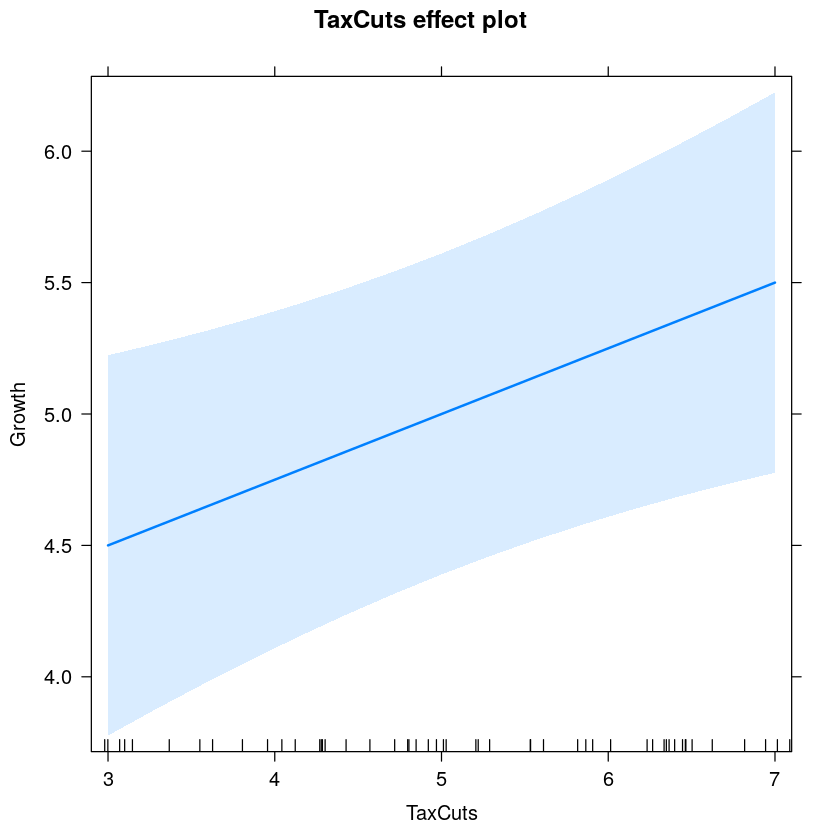

In [60]:
#plot individual effects
Tax.Model.Plot <- allEffects(TaxCutsOnly, xlevels=list(TaxCuts=seq(3, 7, 1)))
plot(Tax.Model.Plot, 'TaxCuts', ylab="Growth")

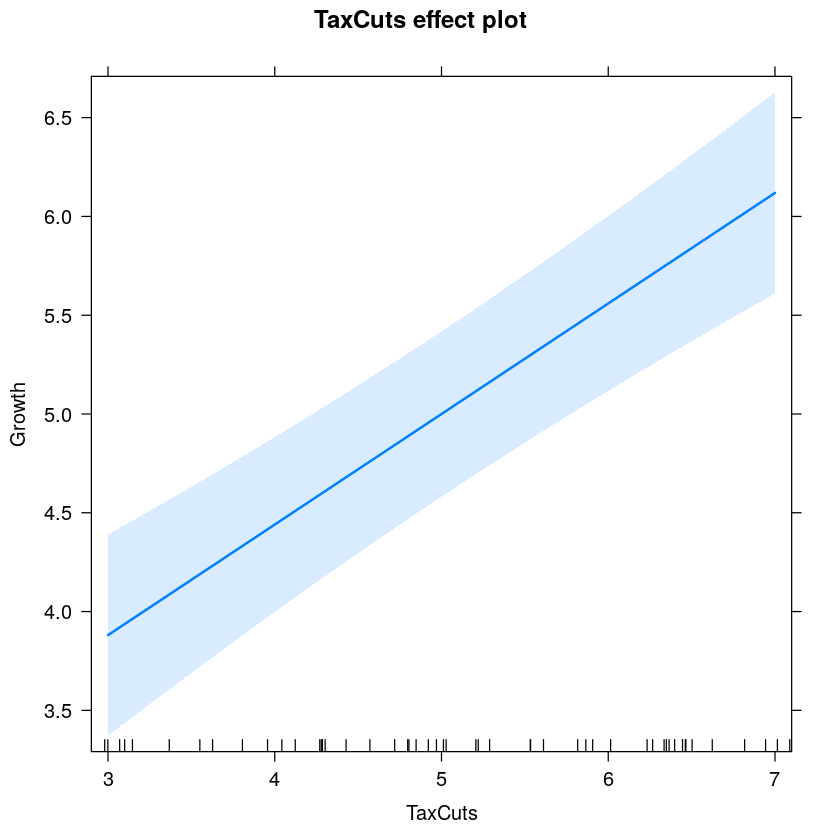

In [61]:
#plot individual effects
Full.Model.Plot <- allEffects(Full.Model, xlevels=list(TaxCuts=seq(3, 7, 1),inflation=seq(3, 7, 1)))
plot(Full.Model.Plot, 'TaxCuts', ylab="Growth")

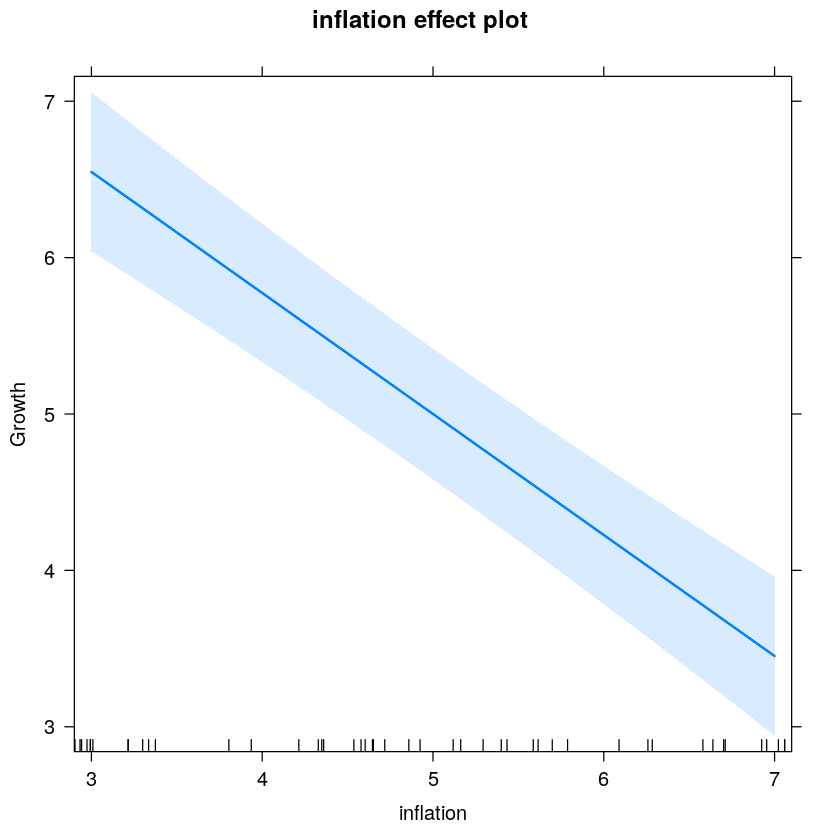

In [62]:
plot(Full.Model.Plot, 'inflation', ylab="Growth")


Warning message in effect.llines(x[good], y[good], lwd = lwd, col = colors[1], lty = lines, :
“spline interpolation may be unstable with only 2 points”Warning message in panel.bands(x[good], y[good], upper[subscripts][good], lower[subscripts][good], :
“spline interpolation may be unstable with only 2 points”Warning message in effect.llines(x[good], y[good], lwd = lwd, col = colors[1], lty = lines, :
“spline interpolation may be unstable with only 2 points”Warning message in panel.bands(x[good], y[good], upper[subscripts][good], lower[subscripts][good], :
“spline interpolation may be unstable with only 2 points”

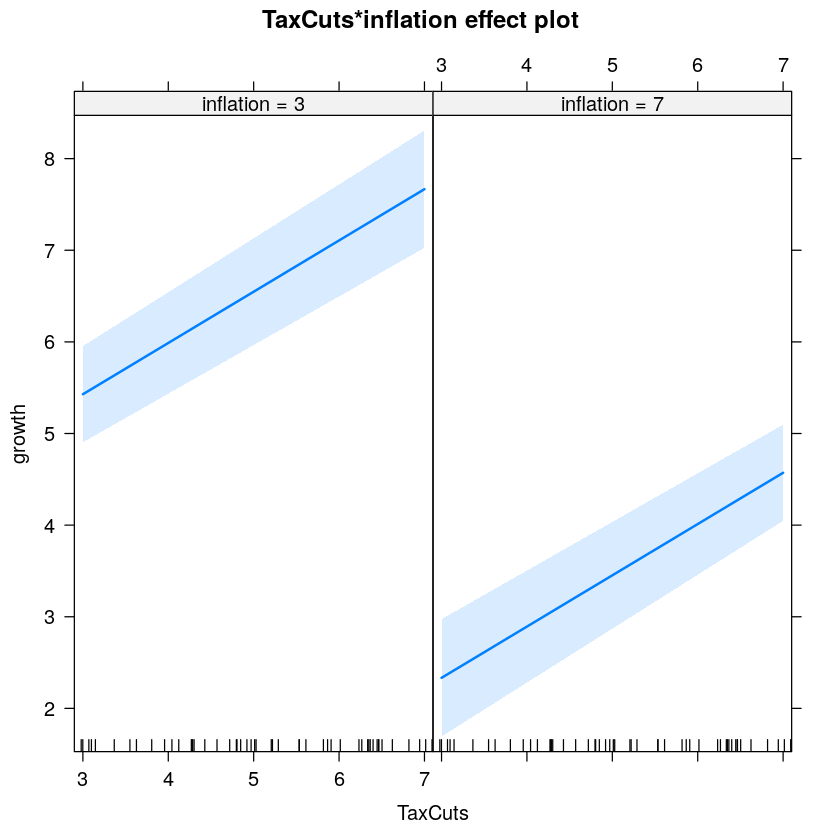

In [64]:
#plot both effects
Full.Model.Plot2<-Effect(c("TaxCuts", "inflation"), Full.Model,xlevels=list(TaxCuts=c(3, 7), inflation=c(3,7)))
plot(Full.Model.Plot2)
     

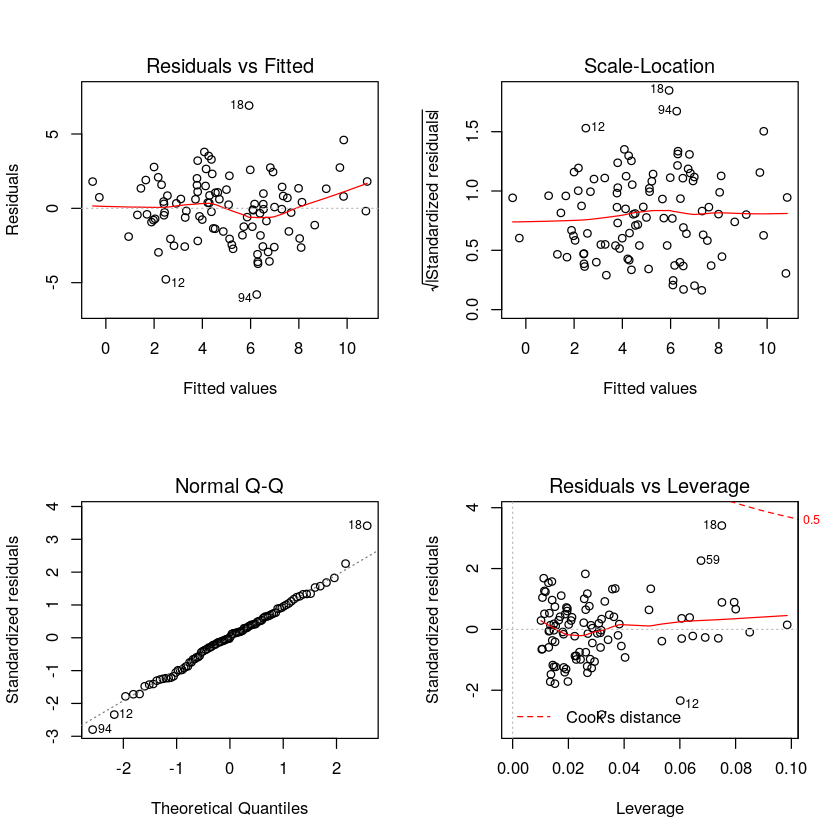

In [65]:
layout(matrix(c(1,2,3,4),2,2)) 
plot(Full.Model)

In [68]:
library(gvlma)
Full.Model.Assumptions <- gvlma(Full.Model) 
summary(Full.Model.Assumptions)


Call:
lm(formula = growth ~ TaxCuts + inflation, data = SuppData)

Residuals:
   Min     1Q Median     3Q    Max 
-5.797 -1.358  0.015  1.324  6.913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.07143    0.45203  13.431  < 2e-16 ***
TaxCuts      0.55952    0.07303   7.662 1.39e-11 ***
inflation   -0.77381    0.07303 -10.596  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.106 on 97 degrees of freedom
Multiple R-squared:  0.5655,	Adjusted R-squared:  0.5565 
F-statistic: 63.12 on 2 and 97 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = Full.Model) 

                    Value p-value                Decision
Global Stat        4.2363  0.3750 Assumptions acceptable.
Skewness           0.1101  0.7400 Assumptions acceptable.
Kurtosis           1.4592  0.2271 Assumptions acceptable

In [72]:
library(car)
set.seed(12345)
# 250 people
n <- 250
# Uniform distrobution of Ages (5 to 15 year olds), but 5 = 0 point
X <- runif(n, 0, 10)
# Centered normal distrobution of IQ (100 +-15) 
Z <- rnorm(n, 0, 15)
e <- rnorm(n, 0, sd=10)
# Our equation to  create Y
Y = .1*X + .25*Z + .1*X*Z + 50 + e
#Built our data frame
Reading.Data<-data.frame(ReadingComp=Y,Age=X,IQ=Z)
#models
Centered.Read.1<-lm(ReadingComp~Age+IQ,Reading.Data)
Centered.Read.2<-lm(ReadingComp~Age*IQ,Reading.Data)

stargazer(Centered.Read.1,Centered.Read.2,type="text",
          column.labels = c("Main Effects", "Interaction"),
          intercept.bottom = FALSE, single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001), notes.append = FALSE,
          header=FALSE)


                                   Dependent variable:               
                    -------------------------------------------------
                                       ReadingComp                   
                          Main Effects             Interaction       
                              (1)                      (2)           
---------------------------------------------------------------------
Constant               47.710*** (1.388)        48.288*** (1.312)    
Age                      0.546* (0.225)           0.440* (0.213)     
IQ                      0.817*** (0.045)         0.333*** (0.095)    
Age:IQ                                           0.085*** (0.015)    
---------------------------------------------------------------------
Observations                  250                      250           
R2                           0.582                    0.630          
Adjusted R2                  0.578                    0.626          
Residual Std. Error

In [73]:
ChangeInR<-anova(Centered.Read.1,Centered.Read.2)
ChangeInR

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
247,26029.37,NA,NA,NA,NA
246,23005.39,1,3023.983,32.3359,3.66472e-08


In [74]:
IQ.SD<-c(mean(Reading.Data$IQ)-sd(Reading.Data$IQ),
         mean(Reading.Data$IQ),
         mean(Reading.Data$IQ)+sd(Reading.Data$IQ))
IQ.SD<-round(IQ.SD,2)
IQ.SD

[1] -13.87   0.74  15.36

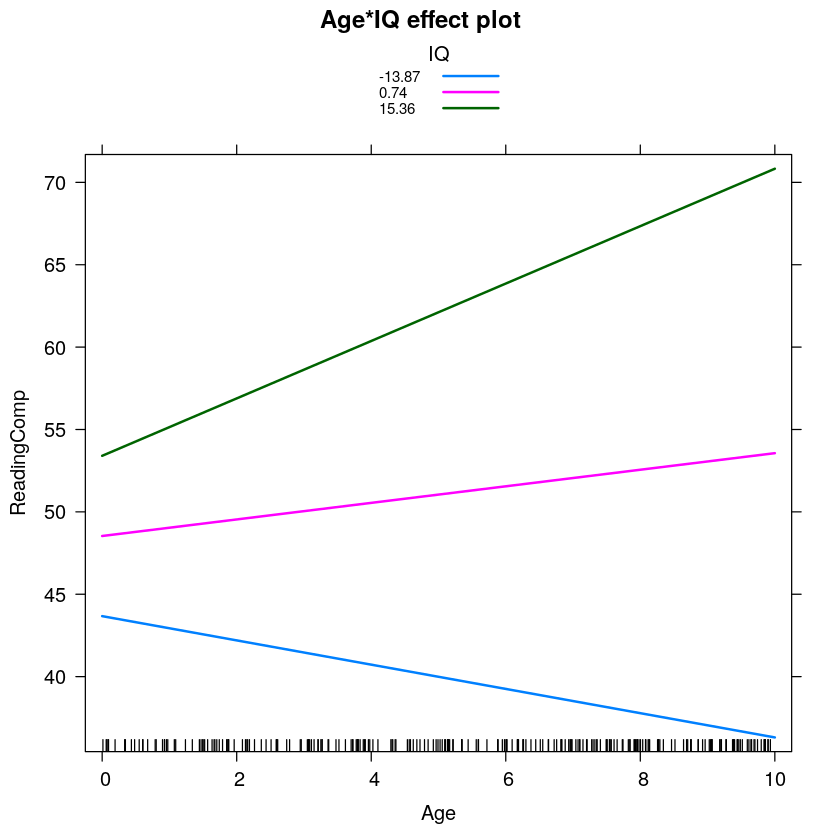

In [75]:
Inter.1c<-effect(c("Age*IQ"), Centered.Read.2,
                 xlevels=list(Age=seq(0,10, 1), 
                              IQ=IQ.SD))
plot(Inter.1c, multiline = TRUE)